In [1]:
from utils.black_scholes import *
from utils.calibrator import *
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data_raw = pd.read_pickle("./data/sse50_option_data_processed_20231110.pkl")
data_raw['moneyness'] = np.log(data_raw['exerciseprice'] / data_raw['F'])
data_raw['vega'] = bs_vega(data_raw['F'], data_raw['exerciseprice'], data_raw['maturity'], data_raw['market_imp_vol'], data_raw['r'], 'c')
fit_option = data_raw[(data_raw["CP"]==1)&(data_raw["settlement_price"]>0.0001)&(data_raw["contract_month"]=='2311')]
fit_option = fit_option.dropna()
fit_option


,date,tradecode,exerciseprice,close,settlement_price,S0,contract_month,CP,实虚值,last_day,maturity,r,F,q,market_imp_vol,moneyness,vega
69,2023-11-10,510050P2311M02400,2.40,0.0027,0.0027,2.49,2311,1,虚值,2023-11-22,0.049587,0.0203,2.492693,-0.001496,0.124843,-0.037895,0.085719
70,2023-11-10,510050P2311M02450,2.45,0.0101,0.0101,2.49,2311,1,虚值,2023-11-22,0.049587,0.0203,2.492693,-0.001496,0.118823,-0.017275,0.177202
71,2023-11-10,510050P2311M02500,2.50,0.0308,0.0308,2.49,2311,1,实值,2023-11-22,0.049587,0.0203,2.492693,-0.001496,0.121844,0.002927,0.220238
72,2023-11-10,510050P2311M02550,2.55,0.0660,0.0660,2.49,2311,1,实值,2023-11-22,0.049587,0.0203,2.492693,-0.001496,0.128505,0.022730,0.163196
73,2023-11-10,510050P2311M02600,2.60,0.1113,0.1113,2.49,2311,1,实值,2023-11-22,0.049587,0.0203,2.492693,-0.001496,0.149101,0.042148,0.100923
74,2023-11-10,510050P2311M02650,2.65,0.1588,0.1600,2.49,2311,1,实值,2023-11-22,0.049587,0.0203,2.492693,-0.001496,0.160923,0.061196,0.053059
75,2023-11-10,510050P2311M02700,2.70,0.2095,0.2100,2.49,2311,1,实值,2023-11-22,0.049587,0.0203,2.492693,-0.001496,0.214180,0.079888,0.056597
76,2023-11-10,510050P2311M02750,2.75,0.2581,0.2600,2.49,2311,1,实值,2023-11-22,0.049587,0.0203,2.492693,-0.001496,0.219323,0.098237,0.030723
77,2023-11-10,510050P2311M02800,2.80,0.3081,0.3100,2.49,2311,1,实值,2023-11-22,0.049587,0.0203,2.492693,-0.001496,0.254385,0.116256,0.028529
79,2023-11-10,510050P2311M02350,2.35,0.0010,0.0010,2.49,2311,1,虚值,2023-11-22,0.049587,0.0203,2.492693,-0.001496,0.143891,-0.058948,0.039538


In [3]:
wing_model_params_list_input = [-0.2, 0.2, 0.5, 0.5]
moneyness_inputs_list = list(fit_option['moneyness'])
mkt_implied_vol_list = list(fit_option['market_imp_vol'])
mkt_vega_list = list(fit_option['vega'])
final_res = wing_model_calibrator(wing_model_params_list_input,
                                  moneyness_inputs_list,
                                  mkt_implied_vol_list,
                                  mkt_vega_list,
                                  is_bound_limit=True)


True
{'vr_': 0.12040800663680938, 'sr_': 0.25686559278197973, 'pc_': 9.8780561288114, 'cc_': 8.815835870851616}


In [4]:
fit_option.insert(fit_option.shape[1], 'wing_model_vol', fit_option['moneyness'].apply(lambda x: wing_model(x, final_res['vr_'], final_res['sr_'], final_res['pc_'], final_res['cc_'], -0.2, 0.2, 0.5, 0.5)))
fit_option.insert(fit_option.shape[1], 'error', fit_option['market_imp_vol'] - fit_option['wing_model_vol'])


Text(0.5, 1.0, '2406')

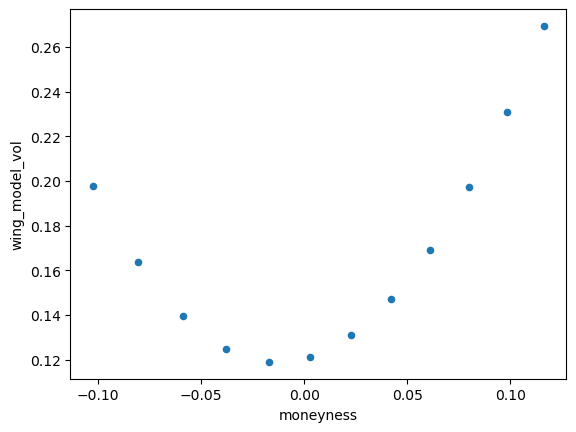

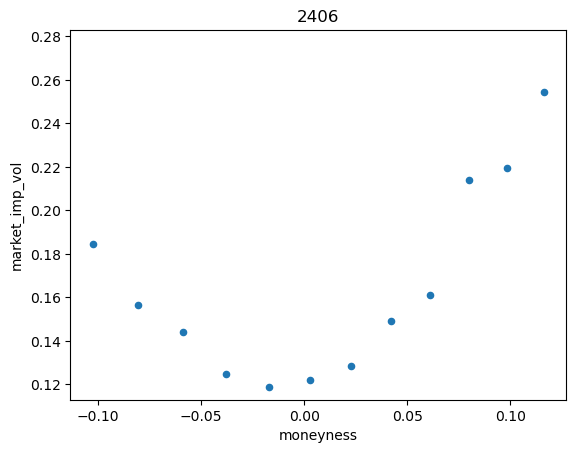

In [5]:
fit_option[["moneyness", "wing_model_vol"]].plot(kind="scatter", x="moneyness", y="wing_model_vol")
fit_option[["moneyness", "market_imp_vol"]].plot(kind="scatter", x="moneyness", y="market_imp_vol")
plt.ylim((fit_option["wing_model_vol"].min()*0.95, fit_option["wing_model_vol"].max()*1.05))
plt.title('2406')


In [6]:
# final_res = {"vr_": 2.62, "sr_": 5, "pc_": 2.28, "cc_": 3.86} # not free of butterfly arbitrage
final_res = {"vr_": 0.136, "sr_": 0.4, "pc_": 0.8, "cc_": 0.8} # not free of butterfly arbitrage


In [121]:
vr = 0.13
# sr = np.linspace(-1.45, 1.5, 60) # step = 0.05
# pc = np.linspace(0.05, 5, 100) # step = 0.05
# cc = np.linspace(0.05, 5, 100) # step = 0.05
sr = np.linspace(-1, 1, 100) # np.arange(-1, 1.01, 0.01)
pc = np.linspace(0.05, 11, 1000)
cc = np.linspace(0.05, 11, 1000)
pdlist = []
for i in sr:
    for j in pc:
        for k in cc:
            pdlist.append([vr, i, j, k])


In [122]:
wing_sim_args = pd.DataFrame(pdlist, columns=['vr_', 'sr_', 'pc_', 'cc_'])
wing_sim_args


,vr_,sr_,pc_,cc_
0,0.13,-1.0,0.05,0.050000
1,0.13,-1.0,0.05,0.060961
2,0.13,-1.0,0.05,0.071922
3,0.13,-1.0,0.05,0.082883
4,0.13,-1.0,0.05,0.093844
...,...,...,...,...
99999995,0.13,1.0,11.00,10.956156
99999996,0.13,1.0,11.00,10.967117
99999997,0.13,1.0,11.00,10.978078
99999998,0.13,1.0,11.00,10.989039


In [123]:
def wing_model_test_1(vr, sr, pc, cc):
    vollist = []
    for i in np.linspace(-0.3, 0.3, 50):
        vollist.append(wing_model(i,vr, sr, pc, cc, -0.3, 0.3, 0.5, 0.5))
    return min(vollist) > 0

def wing_model_test_2(vr, sr, pc, cc):
    _, glist = wing_model_durrleman_condition(vr, sr, pc, cc, -0.3, 0.3, 0.5, 0.5)
    return min(glist) > 0


In [124]:
wing_sim_args.insert(wing_sim_args.shape[1], 'wing_model_test_1', wing_sim_args.apply(lambda x: wing_model_test_1(x['vr_'], x['sr_'], x['pc_'], x['cc_']), axis=1))
wing_sim_args.insert(wing_sim_args.shape[1], 'wing_model_test_2', wing_sim_args.apply(lambda x: wing_model_test_2(x['vr_'], x['sr_'], x['pc_'], x['cc_']), axis=1))
wing_sim_args.insert(wing_sim_args.shape[1], 'wing_model_combined_test', wing_sim_args.apply(lambda x: x['wing_model_test_1'] and x['wing_model_test_2'], axis=1))
# wing_sim_args.to_csv("wing_sim_args.csv", index=False)


In [125]:
wing_sim_args_true = wing_sim_args[wing_sim_args['wing_model_combined_test'] == True]
wing_sim_args_true


,vr_,sr_,pc_,cc_,wing_model_test_1,wing_model_test_2,wing_model_combined_test
4112144,0.13,-0.919192,1.277628,1.628378,True,True,True
4112145,0.13,-0.919192,1.277628,1.639339,True,True,True
4112146,0.13,-0.919192,1.277628,1.650300,True,True,True
4112147,0.13,-0.919192,1.277628,1.661261,True,True,True
4112148,0.13,-0.919192,1.277628,1.672222,True,True,True
...,...,...,...,...,...,...,...
95865210,0.13,0.919192,9.531231,2.351802,True,True,True
95865211,0.13,0.919192,9.531231,2.362763,True,True,True
95865212,0.13,0.919192,9.531231,2.373724,True,True,True
95865213,0.13,0.919192,9.531231,2.384685,True,True,True


In [126]:
print(wing_sim_args.cc_.max(), wing_sim_args_true.cc_.max())
print(wing_sim_args.pc_.max(), wing_sim_args_true.pc_.max())
print(wing_sim_args.sr_.max(), wing_sim_args_true.sr_.max())


11.0 9.531231231231232
11.0 9.531231231231232
1.0 0.9191919191919193


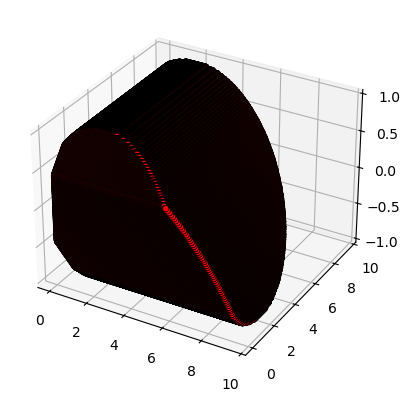

In [127]:
ax = plt.subplot(projection='3d')
# ax.scatter(wing_sim_args['cc_'], wing_sim_args['pc_'], wing_sim_args['sr_'], c=wing_sim_args['wing_model_combined_test'], cmap='coolwarm',edgecolors='black', linewidths=0.5)
ax.scatter(wing_sim_args_true['cc_'], wing_sim_args_true['pc_'], wing_sim_args_true['sr_'], c='red',edgecolors='black', linewidths=0.5) # , c=wing_sim_args['wing_model_combined_test']
plt.show()

# fig = plt.figure(figsize=(20, 18))
# ax = plt.axes(projection='3d')
# ax.plot_surface(wing_sim_args['sr_'], wing_sim_args['pc_'], wing_sim_args['cc_'], rstride=1, cstride=1, cmap='viridis', edgecolor='none')


In [128]:
# vollist = []
# for i in np.linspace(-0.3, 0.3, 200):
#     vollist.append(wing_model(i,final_res['vr_'],
#             final_res['sr_'],
#             final_res['pc_'],
#             final_res['cc_'],
#             -0.3, 0.3, 0.5, 0.5))
# vollist


In [129]:
# klist, glist = wing_model_durrleman_condition(final_res['vr_'],
#                                           final_res['sr_'],
#                                           final_res['pc_'],
#                                           final_res['cc_'],
#                                           -0.3, 0.3, 0.5, 0.5)
# glist


In [130]:
# plt.plot(klist, glist)
